In [2]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=1500)

# 取前五百行
df = df.head(1500)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id', 'type', 'actor_id', 'repo_id', 'repo_name', 'created_at', 'pull_merged_at', 'pull_merged_by_id']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed1.csv', index=False)


In [3]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=1500)

# 取前五百行
df = df.head(1500)

# 删去不需要的列（假设你知道列名）
# columns_to_keep = ['id', 'type', 'actor_id', 'repo_id', 'repo_name', 'created_at', 'pull_merged_at', 'pull_merged_by_id']  # 替换为你需要保留的列名
# df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed1.csv', index=False)


In [ ]:
# 第二次洗数据

import pandas as pd

# 读取CSV文件
df = pd.read_csv('log_2020_01.csv', nrows=10000)

# 取前五百行
df = df.head(10000)

# 删去不需要的列（假设你知道列名）
columns_to_keep = ['id', 'actor_id','actor_login',  'issue_author_type','repo_id', 'repo_name', 'created_at', 'create_description', 'pull_merged_by_type']  # 替换为你需要保留的列名
df = df[columns_to_keep]

# 保存为新的CSV文件
df.to_csv('Washed2.csv', index=False)

C:\Users\23162\AppData\Local\Temp\ipykernel_18132\317231589.py:4: DtypeWarning: Columns (81,82,94,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('log_2020_01.csv', nrows=10000)


Created date counts saved to created_date_counts.csv
Forecasted created date counts saved to forecasted_created_date_counts.csv


c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\23162\AppData\Local\Programs\Python\Python311\Lib

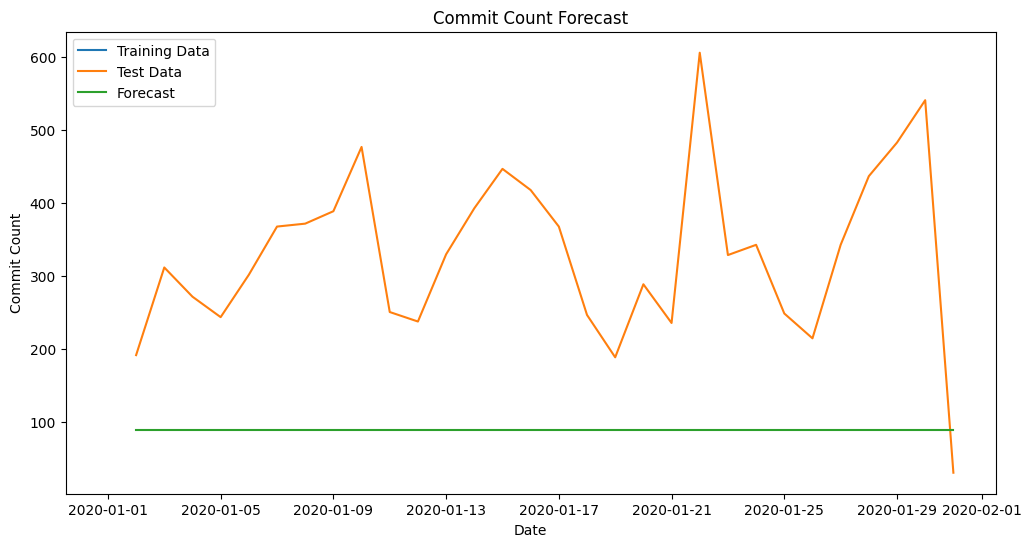

In [ ]:
## 根据统计数，尝试机器学习预测（未成功）

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = 'Washed2.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# 确保数据没有缺失值
df = df.dropna(subset=['created_at', 'repo_id', 'repo_name'])

# 提取created_at中的日期部分并统计频率，生成CSV表格
df['created_date'] = pd.to_datetime(df['created_at']).dt.date
date_counts = df['created_date'].value_counts().reset_index()
date_counts.columns = ['created_date', 'count']
date_counts = date_counts.sort_values('created_date')

# 保存统计频率的CSV表格
date_counts.to_csv('created_date_counts.csv', index=False)
print("Created date counts saved to created_date_counts.csv")

# 设置时间序列数据
date_counts.set_index('created_date', inplace=True)

# 确保时间序列的稳定性
train_data = date_counts.iloc[:-30]  # 选择较早的数据作为训练集
test_data = date_counts.iloc[-30:]   # 选择较新的数据作为测试集

# 确保时间序列的稳定性
train_data_diff = train_data.diff().dropna()

# 定义并训练ARIMA模型
model = ARIMA(train_data_diff, order=(2, 1, 0))  # 调整ARIMA模型的阶数
model_fit = model.fit()

# 预测
forecast_diff = model_fit.forecast(steps=30)
forecast = train_data['count'].iloc[-1] + forecast_diff.cumsum()

# 创建预测结果的DataFrame
forecast_index = pd.date_range(start=test_data.index[0], periods=30, freq='D')
forecast_df = pd.DataFrame(forecast.values, index=forecast_index, columns=['forecast'])
forecast_df = forecast_df.reset_index()
forecast_df.columns = ['created_date', 'forecast']

# 保存预测结果到CSV文件
forecast_df.to_csv('forecasted_created_date_counts.csv', index=False)
print("Forecasted created date counts saved to forecasted_created_date_counts.csv")

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['count'], label='Training Data')
plt.plot(test_data.index, test_data['count'], label='Test Data')
plt.plot(forecast_df['created_date'], forecast_df['forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Commit Count')
plt.title('Commit Count Forecast')
plt.legend()
plt.show()
